In [2]:
!ls

4FAZA.fas				 generating_batchfiles.py
analyzing_output.ipynb			 GREMLIN_TF_v2.ipynb
batch_scripts				 GREMLIN_TF_v2_weights_edit.ipynb
benchmark				 GREMLIN_TF_v2_weights_edit.py
concat_48164139.err			 high_precision_complexes.csv
concat_48164139.out			 merged_top10_statistics_449.csv
concat_48165986.err			 pd_mtx.csv
concat_48165986.out			 pd_mtx_weights.csv
concat_48166061.err			 preparing_complexes.ipynb
concat_48166061.out			 preparing_complexes.py
concat.a2m				 README.md
finding_high_precision_benchmarks.ipynb  running_py.sh
general_complex_sysargv.py		 Untitled.ipynb
generating_batchfiles.ipynb


In [3]:
import pandas as pd
import numpy as np
import os 
import glob
import matplotlib.pyplot as plt

In [4]:
stats_df = pd.read_csv('merged_top10_statistics_449.csv')
stats_df.head()

,Unnamed: 0,Unnamed: 0_x,prefix,pdb,chain1,chain2,uid1,uid2,n_contacts,meffL,...,n_EVC,n_true_EVC,n_EVC_ASA,n_true_EVC_ASA,n_precision,n_true_precision,Unnamed: 0_y,num_top10_8A,output_file,prec_top10_8A
0,0,1,allpdb0006,4IFD,C,J,RRP43_YEAST,RRP44_YEAST,33,0.241886,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1,2,allpdb0007,4IFD,A,G,RRP45_YEAST,RRP40_YEAST,55,1.022561,...,0.0,0.0,0.0,0.0,2.0,1.0,81.0,0.0,allpdb0007/compare/allpdb0007_CouplingScoresCo...,0.0
2,2,4,allpdb0009,4IFD,K,I,RRP6_YEAST,CSL4_YEAST,53,0.597149,...,0.0,0.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN
3,3,14,allpdb0019,4UB8,o,u,PSBO_THEVL,PSBU_THEVL,31,0.333033,...,1.0,0.0,2.0,1.0,0.0,0.0,85.0,0.0,allpdb0019/compare/allpdb0019_CouplingScoresCo...,0.0
4,4,16,allpdb0021,4UB8,E,R,PSBE_THEVL,PSBY_THEVL,38,0.646429,...,0.0,0.0,1.0,0.0,0.0,0.0,115.0,0.0,allpdb0021/compare/allpdb0021_CouplingScoresCo...,0.0


(array([450.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  21.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

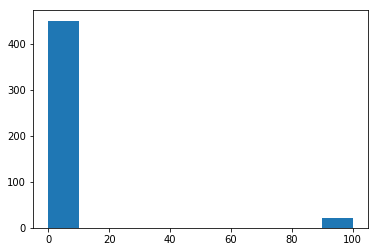

In [5]:
plt.hist(stats_df['prec_top10_8A'].dropna().values)

In [6]:
stats_df.dropna(axis = 0)[(stats_df['prec_top10_8A'].dropna()==0.1)].output_file.str.split('/compare',expand=True)[0].to_csv('low_precision_complexes.csv')